### 1. some image utils

In [3]:
'''math tool'''
import csv
import numpy as np

'''plot tool'''
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.ticker as ticker

'''image tool'''
import cv2
#import pyrealsense2 as rs
import statistics as sta

In [10]:
file_path = "/home/ncslaber/109-2/210816_NTU_half/"
npDepth = np.load("/home/ncslaber/109-2/210816_NTU_half/depth.npy")
# pointCloud = np.load("/home/ncslaber/109-2/210824_calibration/pointCloud_6m.npy")
npColor = np.load("/home/ncslaber/109-2/210816_NTU_half/color.npy")
npDepthF = cv2.convertScaleAbs(npDepth, alpha=0.04) # 6m
npDepthF_color = cv2.applyColorMap(npDepthF, cv2.COLORMAP_JET)

In [7]:
color.shape[::-1]

(3, 640, 480)

In [184]:
np.median(depth[479,:]) # ground L

745.0

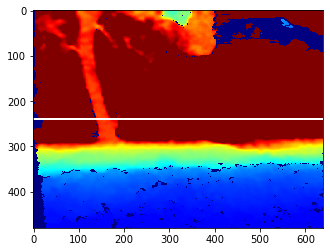

In [10]:
scan_height = 20
offset = int(depth.shape[0]/2-scan_height/2-scan_height*2)
cv2.line(npDepthF_color, (0, int(depth.shape[0]/2)), (depth.shape[1], int(depth.shape[0]/2)), (255, 255, 255), 3)
# cv2.line(npDepthF_color, (0, offset), (depth.shape[1], offset), (255, 255, 255), 3)
# cv2.line(npDepthF_color, (0, offset+scan_height), (depth.shape[1], offset+scan_height), (255, 255, 255), 3)
plt.imshow(cv2.cvtColor(npDepthF_color, cv2.COLOR_BGR2RGB))

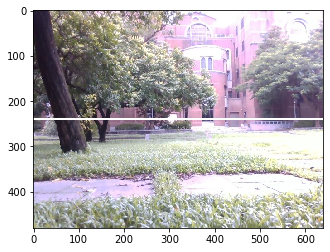

In [12]:
# cv2.line(color, (0, offset), (depth.shape[1], offset), (255, 255, 255), 3)
# cv2.line(color, (0, offset+scan_height), (depth.shape[1], offset+scan_height), (255, 255, 255), 3)
cv2.line(color, (0, int(depth.shape[0]/2)), (depth.shape[1], int(depth.shape[0]/2)), (255, 255, 255), 3)
plt.imshow(color)

### 2. read .pgm

In [1]:
raw_pgm = cv2.imread("/home/ncslaber/hector_48_99.pgm")
raw_pgm = cv2.cvtColor(raw_pgm, cv2.COLOR_BGR2GRAY)
plt.imshow(raw_pgm, cmap='gray') #0,205,254

NameError: name 'cv2' is not defined

## 3. grid value process

In [25]:
gridValue = []
# file_path = "/home/ncslaber/109-2/210725_NTU_leftAreaLibrary/analysis_map/height_middle.txt"
file_path = "/home/ncslaber/109-2/210818_NTU_libraryAll/ChiaY_innerArea/ChiaY_innerArea_gridValue_0818_full.txt"
with open(file_path, 'r') as csvfile:
    rows = csv.reader(csvfile, delimiter=',')
    for row in rows:
        gridValue.append(row)
gridValue = np.asanyarray(gridValue)
gridValue = np.delete(gridValue, -1)
gridValue = gridValue.astype('float')
print("size of grid", gridValue.shape)
gridValue = np.reshape(gridValue,(2048,2048))
gridValue = np.flip(gridValue, 0)

(4194304,)


True

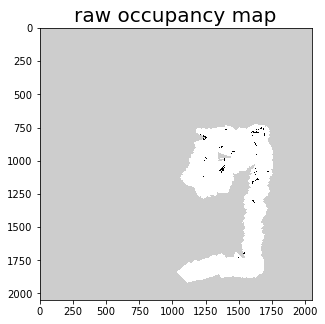

In [26]:
occupancy_map = np.copy(gridValue)
occupancy_map = occupancy_map.astype('float')
occupancy_map[gridValue>0] = 0
occupancy_map[gridValue<0] = 255
occupancy_map[gridValue==0] = 205
occupancy_map = np.reshape(occupancy_map,(2048,2048))
occupancy_map = occupancy_map.astype(dtype="uint8")
fig, ax = plt.subplots(figsize=(5,5))
# plt.axis('off')
plt.title('raw occupancy map',fontsize=20)
plt.imshow(cv2.cvtColor(occupancy_map, cv2.COLOR_GRAY2RGB))
# cv2.imshow("raw_pgm",cv2.cvtColor(occupancy_map, cv2.COLOR_GRAY2RGB))
# cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.imwrite('/home/ncslaber/109-2/210818_NTU_libraryAll/ChiaY_innerArea/height_0.pgm',occupancy_map)

In [27]:
def draw_click_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        print((x, y))
cv2.namedWindow('occupancy_map')
cv2.setMouseCallback('occupancy_map', draw_click_circle)
while True:
    # cv2.imshow('raw_pgm', cv2.resize(raw_pgm, (700, 700)))
    cv2.imshow('occupancy_map', occupancy_map)
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord('q'):
        print("break click!")
        break
cv2.destroyAllWindows()

break click!


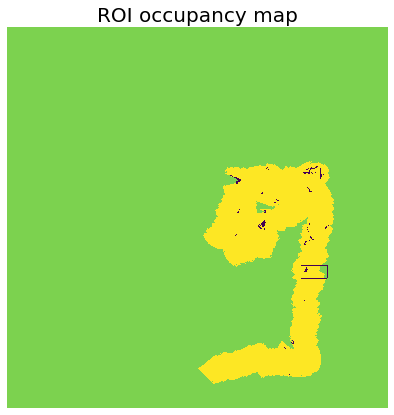

In [30]:
x1 = 750+530
y1 = 900+680
x2 = 750+600
y2 = 900+820
occupancy_map_rec = np.copy(occupancy_map)
cv2.rectangle(occupancy_map_rec,(y1,x1),(y2,x2),0,3)
fig, ax = plt.subplots(figsize=(7,7))
plt.axis('off')
plt.title('ROI occupancy map',fontsize=20)
plt.imshow(occupancy_map_rec)#cv2.cvtColor(occupancy_map_rec, cv2.COLOR_GRAY2RGB)

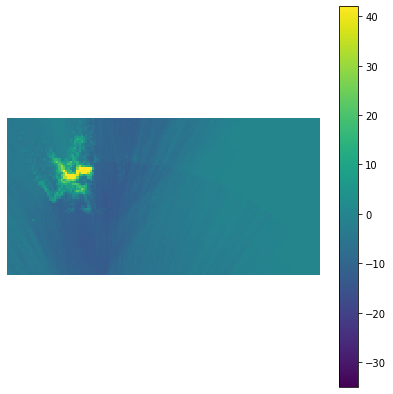

In [36]:
fig, axis = plt.subplots(figsize=(7, 7))
plt.axis('equal')
plt.imshow(gridValue[x1:x2,y1:y2], vmin=-35, vmax=42,)
plt.axis("off")
plt.colorbar()

(0, 10)

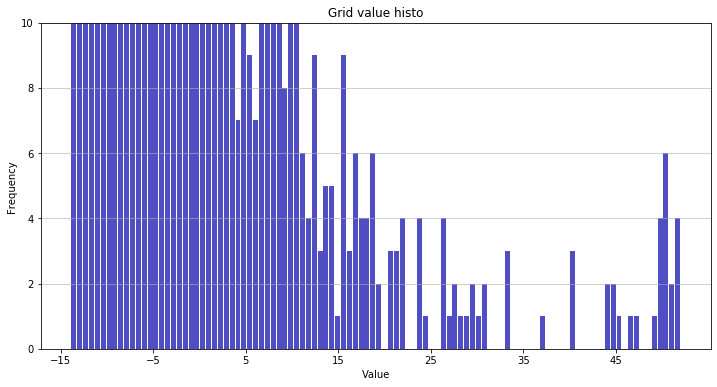

In [45]:
HOG = np.zeros(3000)
value_list = []
for i in range(x1,x2):
    for j in range(y1,y2):
        index = gridValue[i][j]
        value = int(index*10)/10
        value_list.append(value)
        index = int(index*10+1500)
        HOG[index] += 1
HOG_enum = list(enumerate(HOG, start=-1500))
HOG_enum = np.asarray(HOG_enum,dtype='float')
HOG_enum[:,0] /= 10

fig, axis = plt.subplots(figsize=(12, 6))
n, bins, patches = plt.hist(x=value_list, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Grid value histo')
axis.set_xticks(range(-15,50,10))

plt.ylim((0,10))
# plt.xlim((0,100))
# plt.scatter(HOG_enum[:,0], HOG_enum[:,1],label='a')

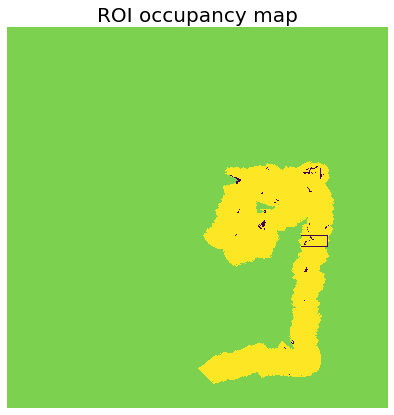

In [47]:
x1 = 750+370
y1 = 900+680
x2 = 750+430
y2 = 900+820
occupancy_map = np.ascontiguousarray(occupancy_map)
occupancy_map_rec = np.copy(occupancy_map)
cv2.rectangle(occupancy_map_rec,(y1,x1),(y2,x2),0,3)
fig, ax = plt.subplots(figsize=(7,7))
plt.axis('off')
plt.title('ROI occupancy map',fontsize=20)
plt.imshow(occupancy_map_rec)#cv2.cvtColor(occupancy_map_rec, cv2.COLOR_GRAY2RGB)

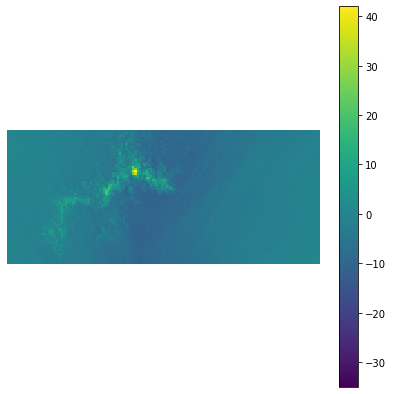

In [53]:
fig, axis = plt.subplots(figsize=(7, 7))
plt.axis('equal')
plt.imshow(gridValue[x1:x2,y1:y2], vmin=-35, vmax=42,)
plt.axis("off")
plt.colorbar()

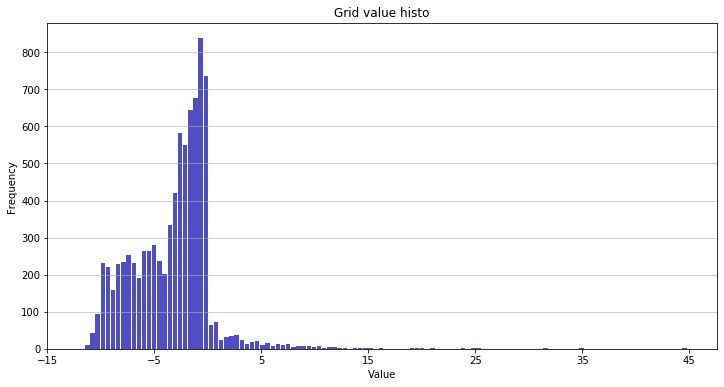

In [51]:
HOG = np.zeros(3000)
value_list = []
for i in range(x1,x2):
    for j in range(y1,y2):
        index = gridValue[i][j]
        value = int(index*10)/10
        value_list.append(value)
        index = int(index*10+1500)
        HOG[index] += 1
HOG_enum = list(enumerate(HOG, start=-1500))
HOG_enum = np.asarray(HOG_enum,dtype='float')
HOG_enum[:,0] /= 10

fig, axis = plt.subplots(figsize=(12, 6))
n, bins, patches = plt.hist(x=value_list, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Grid value histo')
axis.set_xticks(range(-15,50,10))

# plt.ylim((0,10))
# plt.xlim((0,100))
# plt.scatter(HOG_enum[:,0], HOG_enum[:,1],label='a')

(-0.5, 849.5, 1297.5, -0.5)

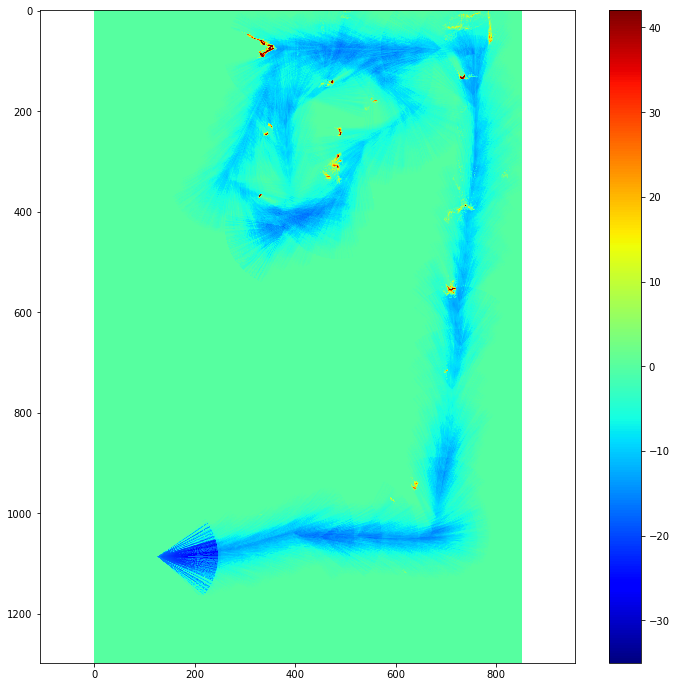

In [89]:
gridValue = np.reshape(gridValue,(1024*2,2*1024))
# gridValue = np.flip(gridValue, 0)
gridValue = np.ascontiguousarray(gridValue)
fig, axis = plt.subplots(figsize=(12, 12))
plt.imshow(gridValue[750:,900:1750],vmin=-35, vmax=42,cmap='jet', aspect='auto')
plt.colorbar()
plt.axis('equal')
# plt.axis("off")

(352842.6177075285, 352873.5195740558, 2767647.4340953534, 2767653.4488269235)

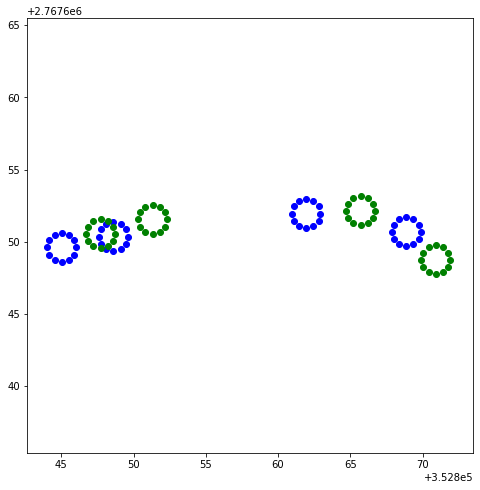

In [27]:
neg_bd_0818_x = []
neg_bd_0818_y = []
neg_bd_0725_x = []
neg_bd_0725_y = []
shp_path = '/home/ncslaber/109-2/210818_NTU_libraryAll/ChiaY_outerHalf_2021-08-17-17-17-10/shapefiles/'
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(4):
    neg_bd = np.load(shp_path+'neg_'+str(i+1)+'_bd_utm.npy')
    plt.scatter(neg_bd[:,0], neg_bd[:,1], c='b')
    neg_bd_0818_x.append(neg_bd[:,0])
    neg_bd_0818_y.append(neg_bd[:,1])
    
shp_path = '/home/ncslaber/109-2/210725_NTU_leftAreaLibrary/ntu_test3_2021-07-25-18-23-39/shapefiles/'
for i in range(4):
    neg_bd = np.load(shp_path+'neg_'+str(i+1)+'_bd_utm.npy')
    plt.scatter(neg_bd[:,0], neg_bd[:,1], c='g')
    neg_bd_0725_x.append(neg_bd[:,0])
    neg_bd_0725_y.append(neg_bd[:,1])
plt.axis('equal')

In [19]:
neg_bd_0818_x = np.asarray(neg_bd_0818_x)
neg_bd_0725_x = np.asarray(neg_bd_0725_x)
neg_bd_0818_y = np.asarray(neg_bd_0818_y)
neg_bd_0725_y = np.asarray(neg_bd_0725_y)
neg_bd_0818_x = neg_bd_0818_x.reshape((1,-2))
neg_bd_0818_y = neg_bd_0818_y.reshape((1,-2))
neg_bd_0725_x = neg_bd_0725_x.reshape((1,-2))
neg_bd_0725_y = neg_bd_0725_y.reshape((1,-2))

base = np.ones(48)
neg_bd_0818 = np.vstack((neg_bd_0818_x,neg_bd_0818_y,base))
neg_bd_0725 = np.vstack((neg_bd_0725_x,neg_bd_0725_y,base))
print(neg_bd_0725.shape)

(3, 48)


In [20]:
pinv = np.linalg.pinv(neg_bd_0818)
T1 = neg_bd_0725.dot(pinv)
neg_bd_0818_T = T1.dot(neg_bd_0818)

In [24]:
T1

array([[ 9.70570559e-01,  4.17630131e-01, -1.14546713e+06],
       [-1.35115161e-01,  1.36874816e+00, -9.72889766e+05],
       [-8.67361738e-19,  1.04083409e-17,  1.00000000e+00]])

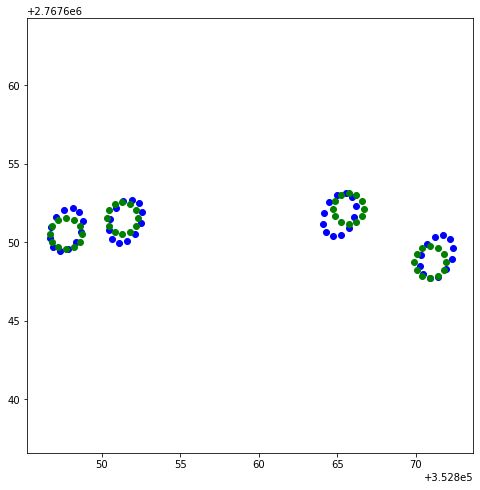

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.axis('equal')
plt.scatter(tmp[0], tmp[1], c='b')
plt.scatter(neg_bd_0725[0], neg_bd_0725[1], c='g')